# Example: REV analysis for PD

This example demonstrates how to perform REV analysis for persistence diagrams (PD), generated by PD-generator.

PD is a set of "birth"-"death" persistence pairs located at $XY$ coordinate plane. (TO DO: describe PD more here).

Using our library, one can perform REV analysis for PD$_0$, PD$_1$ and PD$_2$ - persistence diagrams of rank 0, 1 and 3, respectively. Four different vectorization methods, mapping 2D PD structure into 1D vector, are available: simple binnig, persistence image, landscape and silhouette.

Here, we present REV analysis of PD with PD$_0$ and PD$_1$ metrics and simple binnig vectorization method.

In [1]:
from revanalyzer import REVAnalyzer
from revanalyzer.metrics import PD0, PD1
from revanalyzer.vectorizers import SimpleBinningVectorizer

In [2]:
#inizialization

image = 'ceramic300' #binary file of 'uint8' type representing 3D image.
size = 300 #image linear size. Note, that only cubical images can be analyzed. 
cut_step = 50 # increment step of subcube size
sREV_max_size = 200 #maximal subcube size for which sREV analysis is performed.
datadir = 'data' # path to folder containing image, default: 'data'
outputdir = 'output' # path to outputfolder containig image, default: 'output'

bins = 20 #number of bins at each axe in XY plane.
skip_zeros = True # If True, bins of 2D histogram empty for both compared PDs are not included into the final vectors;
                  #default: True.
vectorizer = SimpleBinningVectorizer(bins) #vectorizer inizialization

exe_path = '/home/azubov/pd_generator/pore-network-extraction/build_release/bin/persistence_pairs' #path to 
            #PD generator 

n_threads = 32 #number of CPU cores used by PD generator, default: 1

show_time = True #default: False. Added to monitor time cost for large images.

metric = PD0(vectorizer = vectorizer, exe_path = exe_path, n_threads = n_threads, show_time = show_time)

analyzer = REVAnalyzer(metric = metric, image = image, cut_step = cut_step, sREV_max_size = sREV_max_size,
                       datadir = datadir, outputdir = outputdir)


In [3]:
#generate metric data for all the subcubes
analyzer.generate()

cut  cut0 , run time: 
--- 48.0411856174469 seconds ---
cut  cut0_50 , run time: 
--- 0.2783668041229248 seconds ---
cut  cut1_50 , run time: 
--- 0.21027231216430664 seconds ---
cut  cut2_50 , run time: 
--- 0.24201059341430664 seconds ---
cut  cut3_50 , run time: 
--- 0.21950411796569824 seconds ---
cut  cut4_50 , run time: 
--- 0.2165060043334961 seconds ---
cut  cut5_50 , run time: 
--- 0.22999978065490723 seconds ---
cut  cut6_50 , run time: 
--- 0.21248459815979004 seconds ---
cut  cut7_50 , run time: 
--- 0.23636150360107422 seconds ---
cut  cut8_50 , run time: 
--- 0.20322346687316895 seconds ---
cut  cut0_100 , run time: 
--- 1.6181814670562744 seconds ---
cut  cut1_100 , run time: 
--- 1.5840339660644531 seconds ---
cut  cut2_100 , run time: 
--- 1.6449289321899414 seconds ---
cut  cut3_100 , run time: 
--- 1.6228663921356201 seconds ---
cut  cut4_100 , run time: 
--- 1.5834767818450928 seconds ---
cut  cut5_100 , run time: 
--- 1.639204502105713 seconds ---
cut  cut6_100 , r

In [4]:
#read the metric values for the specific subcube:
cut_size = 150
cut_id = 5
value = analyzer.read(cut_size, cut_id)
print(value)

[[-10.1504    -2.82895 ]
 [ -9.49242   -3.63874 ]
 [ -9.49237   -8.92277 ]
 ...
 [ -0.500725  -0.500725]
 [ -0.500272   3.97214 ]
 [ -0.500091   1.5     ]]


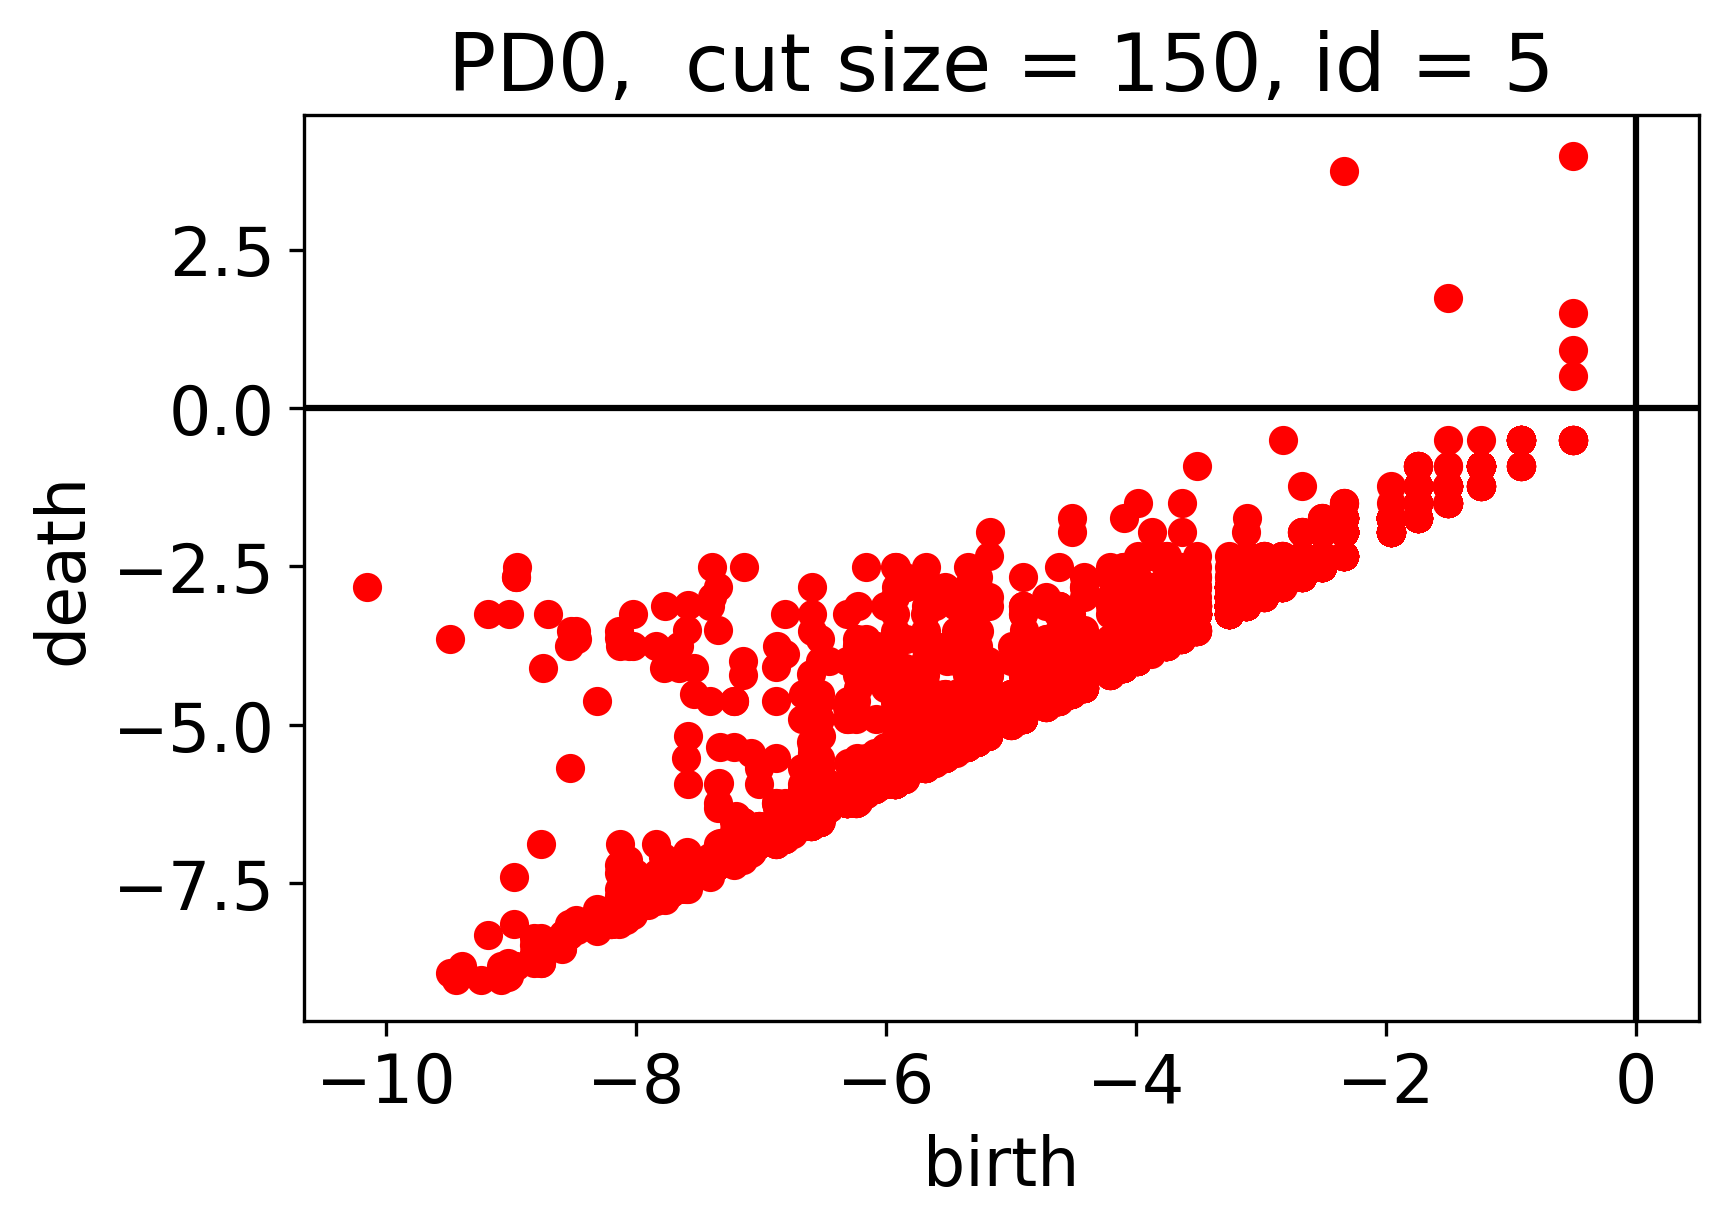

In [5]:
#Visualize PD for a given subcube:
analyzer.show(cut_size, cut_id)

In [6]:
#vectorization
analyzer.vectorize()

In [7]:
#fix thresholds and analyze vectorized data
dREV_threshold = 0.2
sREV_threshold = 0.2
analyzer.analyze(dREV_threshold, sREV_threshold)

In [8]:
print(analyzer.metric_mean)
print(analyzer.metric_std)
print(analyzer.metric_normed_std_1)
print(analyzer.metric_normed_std_2)

{100: 0.43191266012435164, 150: 0.16515155530322256, 200: 0.08963866365099481, 250: 0.042565255980750526, 300: 0.019457986556533538}
{100: 0.12129491083675575, 150: 0.05834312099506982, 200: 0.03855647404170247, 250: 0.009156894993867527}
{100: 0.6064745541837787, 150: 0.2917156049753491, 200: 0.19278237020851233, 250: 0.04578447496933763}
{100: 0.28083203396222245, 150: 0.2917156049753491, 200: 0.19278237020851233, 250: 0.04578447496933763}


In [9]:
#get dREV and sREV size estimation
print(analyzer.dREV_size_1)
print(analyzer.sREV_size_1)
print(analyzer.sREV_size_2)

150
200
200


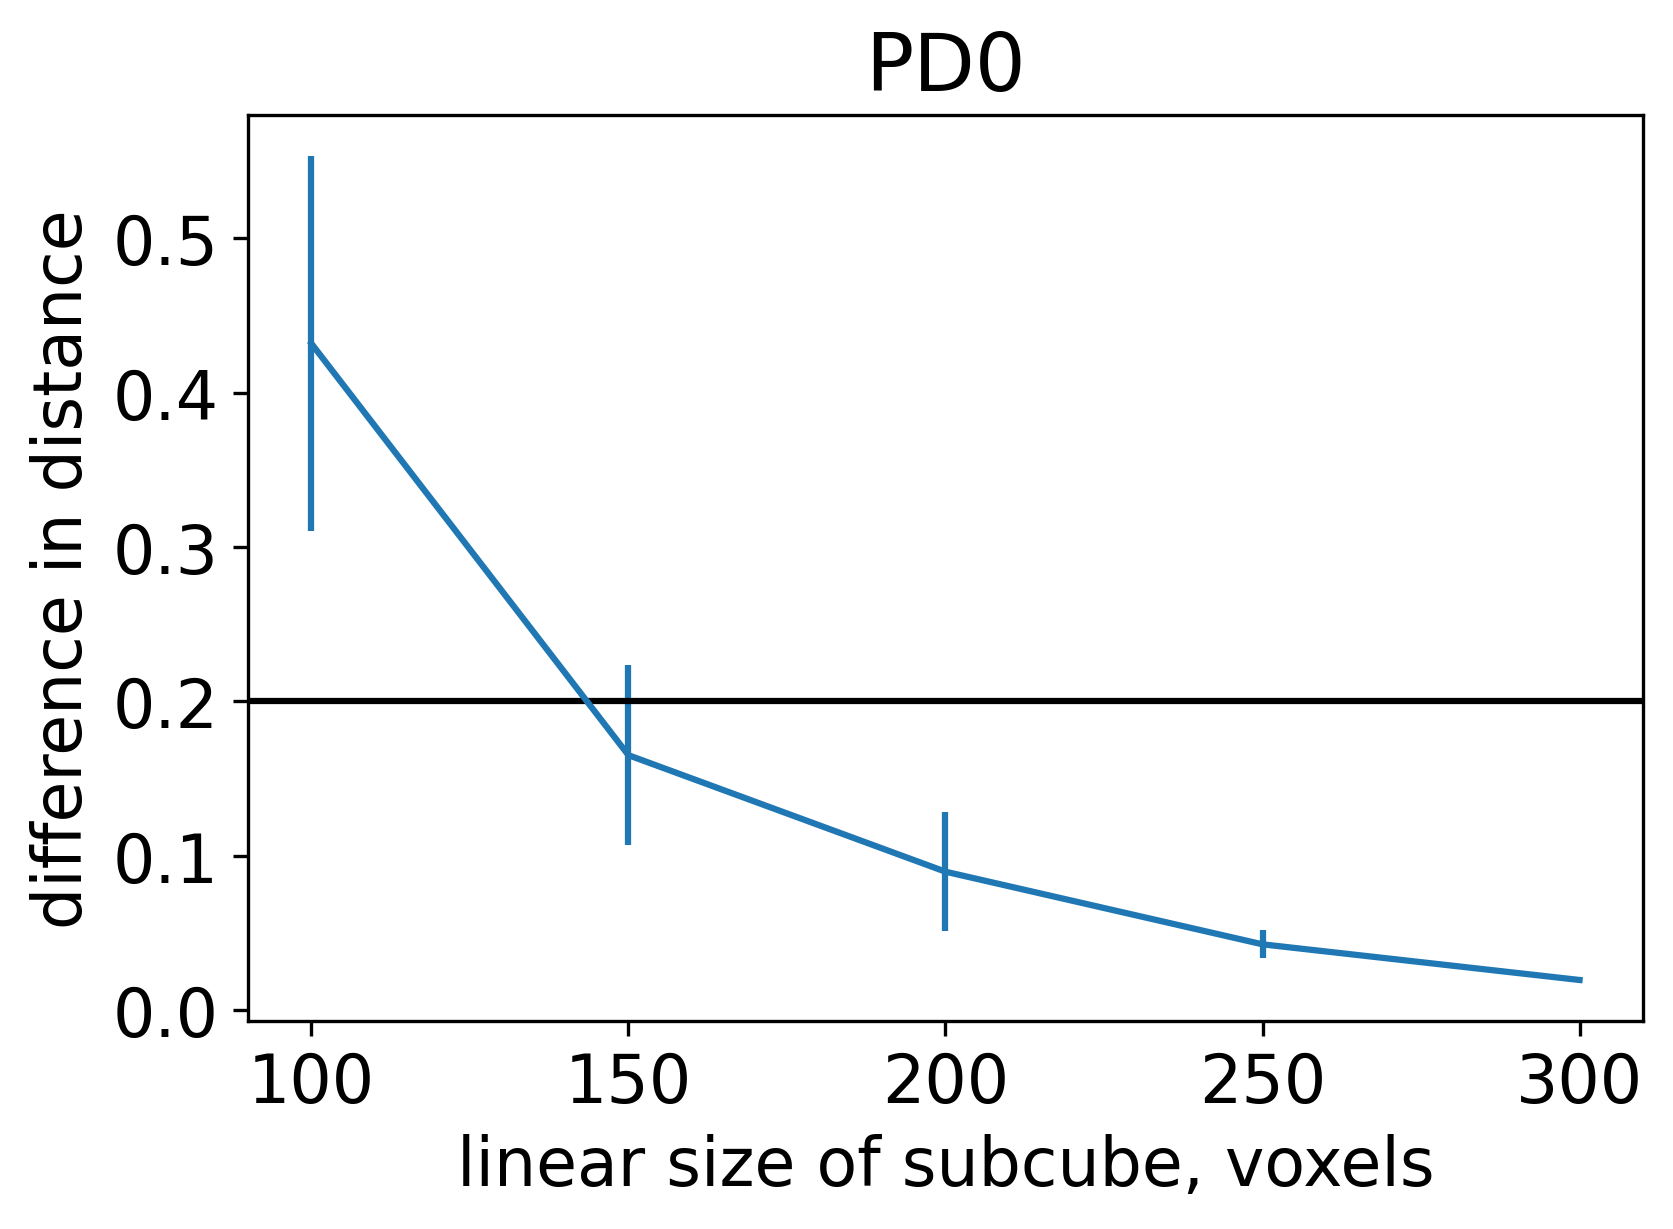

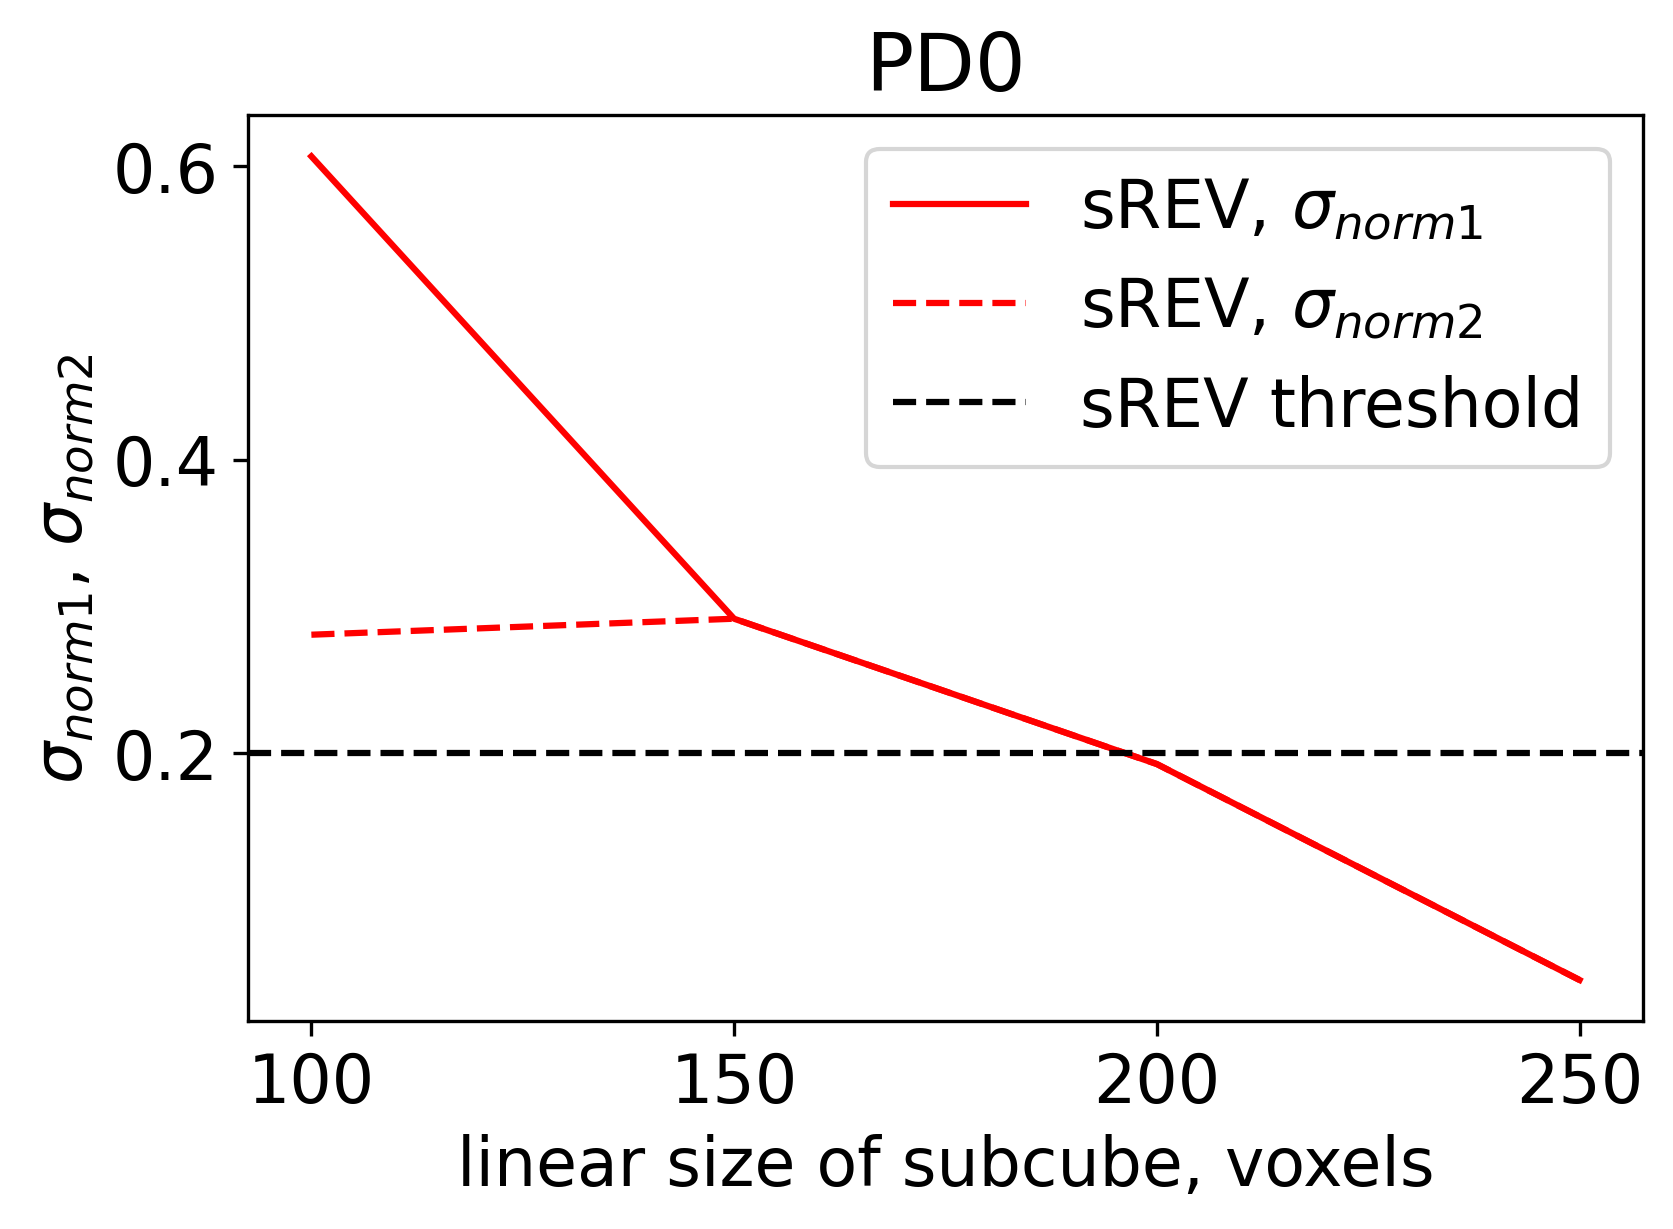

In [10]:
analyzer.show_results()

In [11]:
#Note PD generator generates both PD0, PD1 and PD2 data, whenever one of this metrics is chosen. 
#So calling the function generate() can be skiped, if one wants now to consider PD1 metric.

metric = PD1(vectorizer = vectorizer, exe_path = exe_path, n_threads = n_threads, show_time = show_time)

analyzer = REVAnalyzer(metric = metric, image = image, cut_step = cut_step, sREV_max_size = sREV_max_size,
                       datadir = datadir, outputdir = outputdir)

analyzer.vectorize()
dREV_threshold = 0.2
sREV_threshold = 0.2
analyzer.analyze(dREV_threshold, sREV_threshold)

In [14]:
print(analyzer.metric_mean)
print(analyzer.metric_std)
print(analyzer.metric_normed_std_1)
print(analyzer.metric_normed_std_2)
print(analyzer.dREV_size_1)
print(analyzer.sREV_size_1)
print(analyzer.sREV_size_2)

{100: 0.45017536981009015, 150: 0.16167001819034846, 200: 0.07896554038217818, 250: 0.045172320169702476, 300: 0.03819769703245246}
{100: 0.1067021510623342, 150: 0.04456238361881455, 200: 0.03239793476724491, 250: 0.012201965765243733}
{100: 0.533510755311671, 150: 0.22281191809407275, 200: 0.16198967383622453, 250: 0.061009828826218665}
{100: 0.23702352065006868, 150: 0.22281191809407275, 200: 0.16198967383622453, 250: 0.061009828826218665}
150
200
200


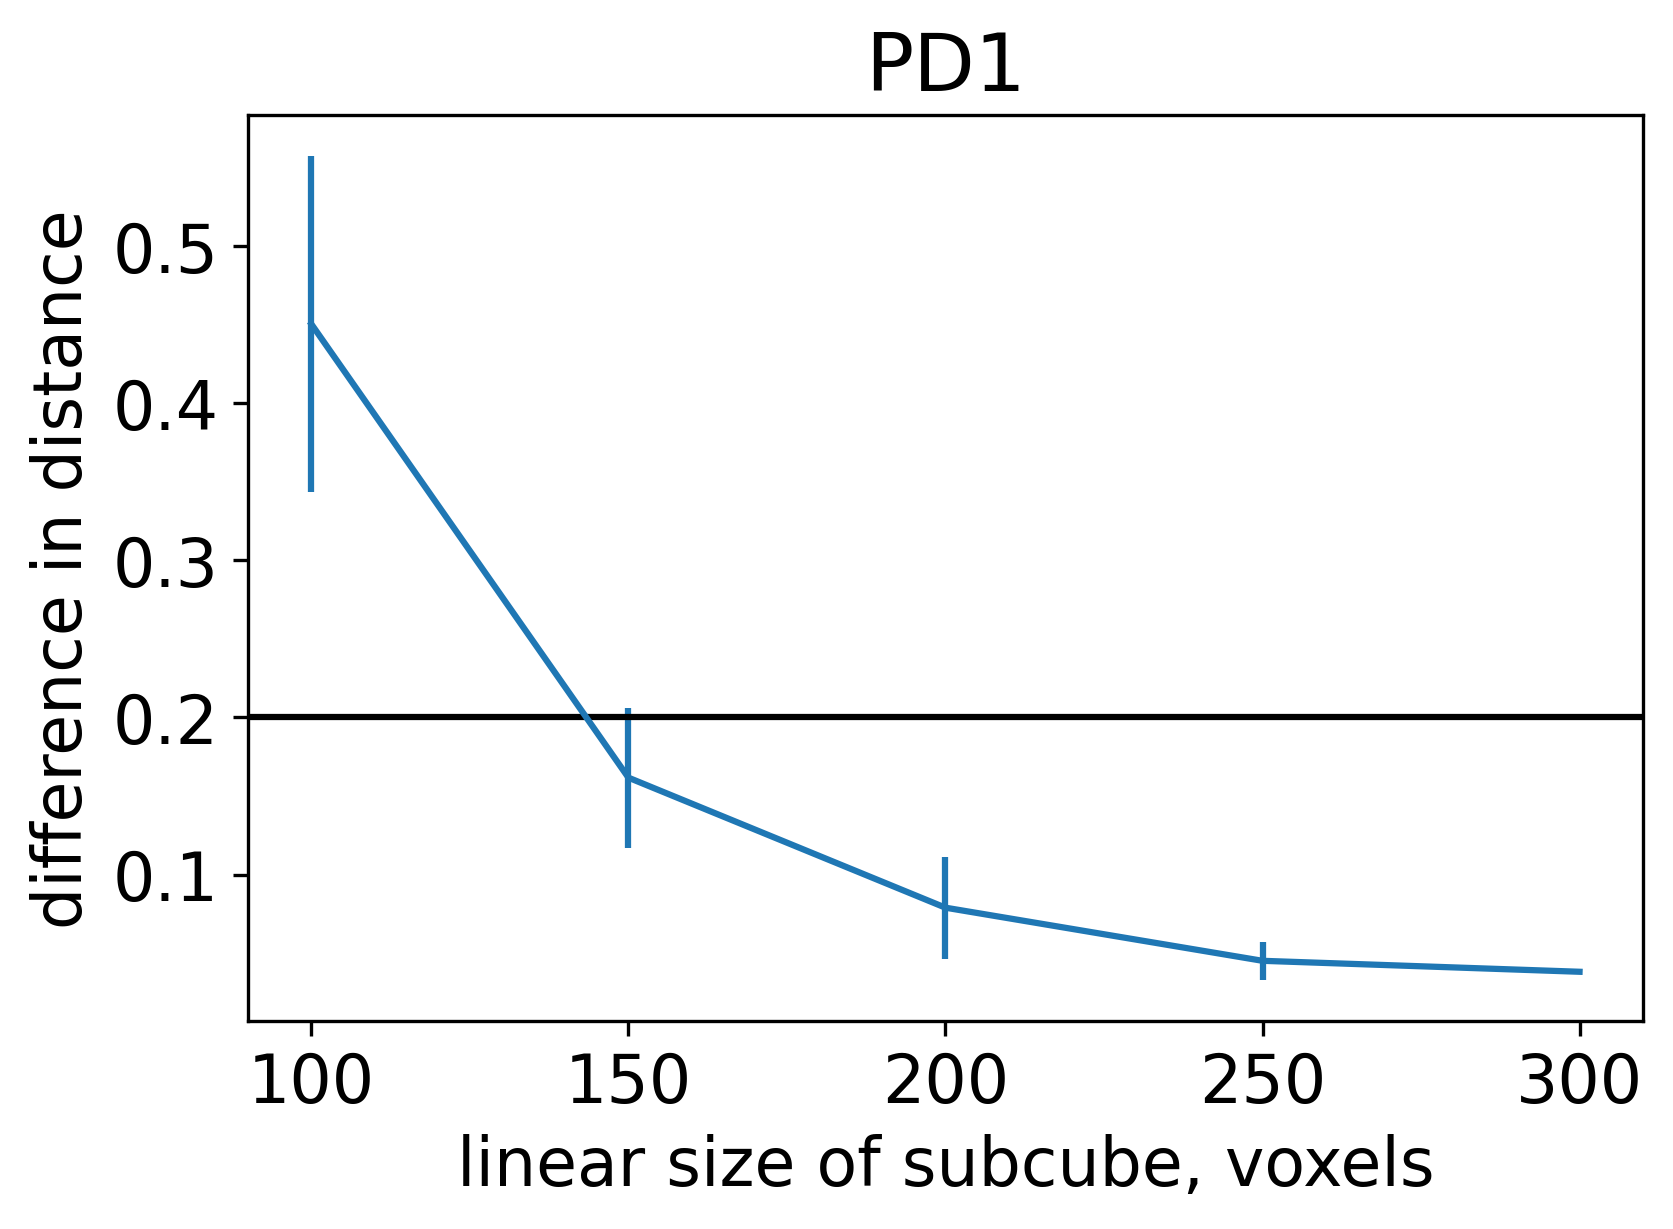

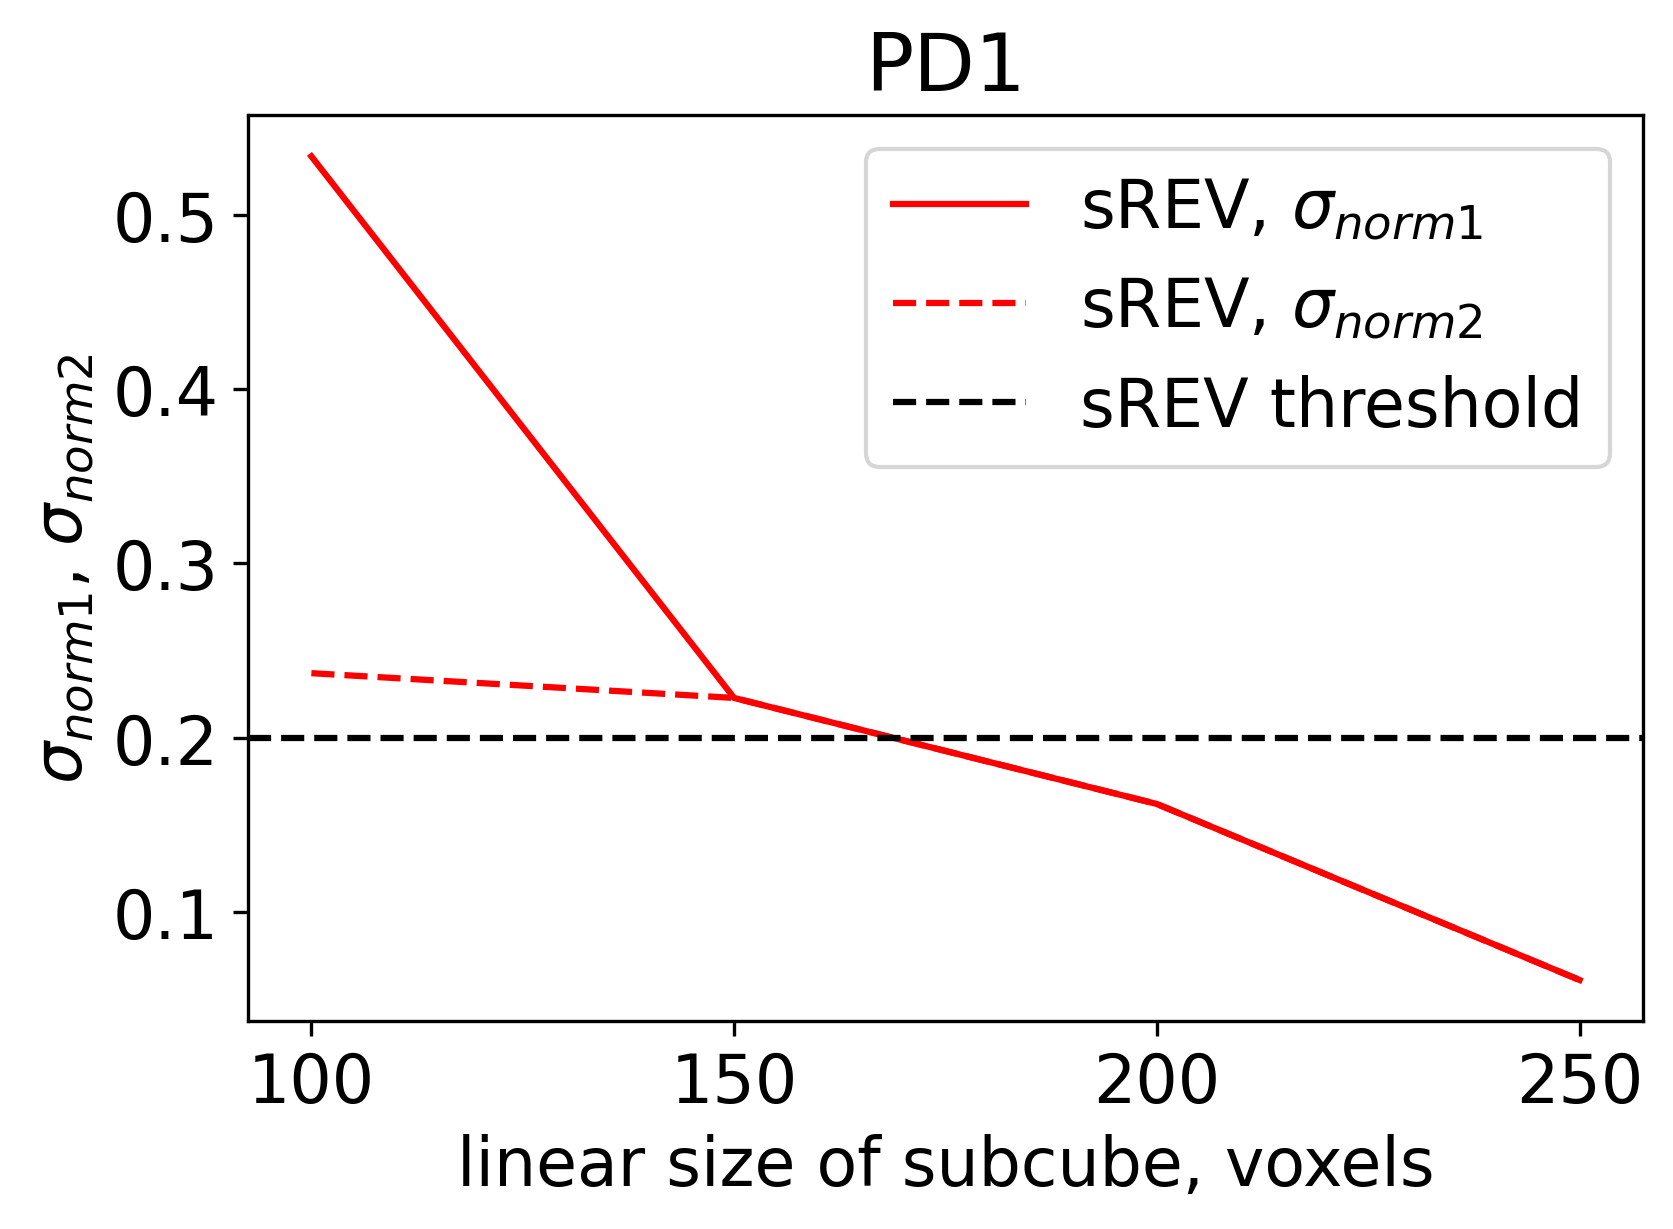

In [13]:
analyzer.show_results()